In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

# Import text stuffs
import re
import string

# Import visualisation tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import NLTK stuffs
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')

# Import Vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import Models and Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_original = pd.read_csv("/content/drive/MyDrive/mbti_1.csv")
# train1=pd.read_csv()
# test_original = pd.read_csv("../input/test.csv")

In [ ]:
train = train_original.copy()
# test = test_original.copy()
full = pd.concat([train], ignore_index=True, sort=False)

In [ ]:
train = train_original.copy()
# test = test_original.copy()
full = pd.concat([train])

In [ ]:
train_original.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
trainshape = train_original.shape
# testshape = test_original.shape
fullshape = full.shape
print(trainshape)
# print(testshape)
print(fullshape)

(8675, 2)
(8675, 2)


In [ ]:
# Checking for personality types
train_original['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [ ]:
train_original.iloc[1163 ,1]

"It's Not My Fault That I'm Not Popular, anyone? I recently began reading it and I just want to give Tomoko a big hug.|||oh that's nice i guess i could be an intj instead./strokes one of those white fluffy cats with the mashed up faces and laughs at globe maniacally  I'm guessing xSFJ. Lots and lots of Si and Fe.|||Heh, that's me!|||http://www.youtube.com/watch?v=N8F5YSA1Oz0&amp;feature=relmfu /One-ups everyone.|||I didn't even notice it, but now that you mention it it's annoying the shit out of me. It's pointing up at something I'd rather not mention {I'm sure you can deduce} in another tab.|||Link it if it's worth watching.  http://www.youtube.com/watch?v=9C_HReR_McQ|||wow rude. :[|||Donnetout cechic etromantique. Alors faisons-le comme ils le font sur u200bu200bdécouverte canal Je tiens à vous dire comment se plonger dans ta chatte caverneux Nous allons tenir la main sur un tas de...|||http://24.media.tumblr.com/tumblr_ltx26s9wFT1qbtkcmo1_500.jpg Scientists, too. Y'all mothafuckas l

In [ ]:
# Creating a data frame for us to play around with safely
EDAdf = train_original.copy()
EDAdf['post_length']=EDAdf['posts'].apply(lambda x :len(x.split('|||')))
len(EDAdf.iloc[0,1].split('|||'))

50

In [ ]:
EDAdf[EDAdf['post_length']>50].head()
EDAdf[EDAdf['post_length']>50].head()

,type,posts,post_length
55,INFP,'ideal you |||||| real you |||||| Introve...,58
167,INTJ,"'Hi, are you really manic?|||greetings.|||Yes,...",59
200,ESFP,'Edit: I forgot what board this was on.|||I am...,53
207,INTP,'http://chzragecomics.files.wordpress.com/2012...,56
293,ENTP,'liberal arts is stupid. Get an engineering o...,63


In [ ]:
pattern = "[\\|\\|\\|]+"
split_post = re.split(pattern, train_original.iloc[1163 ,1])
split_post

["It's Not My Fault That I'm Not Popular, anyone? I recently began reading it and I just want to give Tomoko a big hug.",
 "oh that's nice i guess i could be an intj instead./strokes one of those white fluffy cats with the mashed up faces and laughs at globe maniacally  I'm guessing xSFJ. Lots and lots of Si and Fe.",
 "Heh, that's me!",
 'http://www.youtube.com/watch?v=N8F5YSA1Oz0&amp;feature=relmfu /One-ups everyone.',
 "I didn't even notice it, but now that you mention it it's annoying the shit out of me. It's pointing up at something I'd rather not mention {I'm sure you can deduce} in another tab.",
 "Link it if it's worth watching.  http://www.youtube.com/watch?v=9C_HReR_McQ",
 'wow rude. :[',
 'Donnetout cechic etromantique. Alors faisons-le comme ils le font sur u200bu200bdécouverte canal Je tiens à vous dire comment se plonger dans ta chatte caverneux Nous allons tenir la main sur un tas de...',
 "http://24.media.tumblr.com/tumblr_ltx26s9wFT1qbtkcmo1_500.jpg Scientists, too. Y'

In [ ]:
EDAdf[EDAdf['post_length']>50].head()

,type,posts,post_length
55,INFP,'ideal you |||||| real you |||||| Introve...,58
167,INTJ,"'Hi, are you really manic?|||greetings.|||Yes,...",59
200,ESFP,'Edit: I forgot what board this was on.|||I am...,53
207,INTP,'http://chzragecomics.files.wordpress.com/2012...,56
293,ENTP,'liberal arts is stupid. Get an engineering o...,63


In [ ]:
# create new column with revised posts text
EDAdf['posts_r'] = EDAdf['posts'].copy()

# replaces post separators with empty space
EDAdf['posts_r'] = EDAdf['posts_r'].apply(lambda x: x.replace('|||', ' '))


# replace hyperlinks with 'URL'
EDAdf['posts_r'] = EDAdf['posts_r'].apply(lambda x: re.sub\
                                                  (r'\bhttps?:\/\/.*?[\r\n]*? ', 'URL ', x, flags=re.MULTILINE))

EDAdf.head()

,type,posts,post_length,posts_r
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,'URL URL enfp and intj moments URL sportscen...
1,ENTP,'I'm finding the lack of me in these posts ver...,50,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,"'Good one _____ URL Of course, to which I s..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...,50,'You're fired. That's another silly misconcept...


In [ ]:
# Add columns for the total number of words (across 50 posts), and average words per post
EDAdf['total_words'] = EDAdf['posts_r'].apply(lambda x: len(re.findall(r'\w+', x)))
EDAdf['avg_words_per_post'] = EDAdf['total_words'] / 50
EDAdf['total_ellipsis'] = EDAdf['posts_r'].apply(lambda x: len(re.findall("[/././.]+", x)))
EDAdf['avg_ellipsis_per_post'] = EDAdf['total_ellipsis'] / 50
EDAdf.head()

,type,posts,post_length,posts_r,total_words,avg_words_per_post,total_ellipsis,avg_ellipsis_per_post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,'URL URL enfp and intj moments URL sportscen...,624,12.48,52,1.04
1,ENTP,'I'm finding the lack of me in these posts ver...,50,'I'm finding the lack of me in these posts ver...,1268,25.36,125,2.50
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,"'Good one _____ URL Of course, to which I s...",913,18.26,65,1.30
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,"'Dear INTP, I enjoyed our conversation the o...",1164,23.28,104,2.08
4,ENTJ,'You're fired.|||That's another silly misconce...,50,'You're fired. That's another silly misconcept...,1049,20.98,101,2.02


In [ ]:
EDAdf['avg_words_per_post'].mean()

26.424853025936567

In [ ]:
EDAdf['avg_words_per_post'].groupby(EDAdf['type']).mean()


type
ENFJ    27.650632
ENFP    27.116948
ENTJ    26.211515
ENTP    26.042336
ESFJ    27.770952
ESFP    22.192083
ESTJ    26.428205
ESTP    25.071910
INFJ    27.495510
INFP    26.801070
INTJ    25.722970
INTP    25.860966
ISFJ    26.789036
ISFP    24.605166
ISTJ    26.185463
ISTP    25.231632
Name: avg_words_per_post, dtype: float64

In [ ]:
split_post

["It's Not My Fault That I'm Not Popular, anyone? I recently began reading it and I just want to give Tomoko a big hug.",
 "oh that's nice i guess i could be an intj instead./strokes one of those white fluffy cats with the mashed up faces and laughs at globe maniacally  I'm guessing xSFJ. Lots and lots of Si and Fe.",
 "Heh, that's me!",
 'http://www.youtube.com/watch?v=N8F5YSA1Oz0&amp;feature=relmfu /One-ups everyone.',
 "I didn't even notice it, but now that you mention it it's annoying the shit out of me. It's pointing up at something I'd rather not mention {I'm sure you can deduce} in another tab.",
 "Link it if it's worth watching.  http://www.youtube.com/watch?v=9C_HReR_McQ",
 'wow rude. :[',
 'Donnetout cechic etromantique. Alors faisons-le comme ils le font sur u200bu200bdécouverte canal Je tiens à vous dire comment se plonger dans ta chatte caverneux Nous allons tenir la main sur un tas de...',
 "http://24.media.tumblr.com/tumblr_ltx26s9wFT1qbtkcmo1_500.jpg Scientists, too. Y'

In [ ]:
train = train_original.copy()
# test = test_original.copy()
full = pd.concat([train], ignore_index=True)
train_visual = train_original.copy()

In [ ]:
train_original['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

<function matplotlib.pyplot.plot>

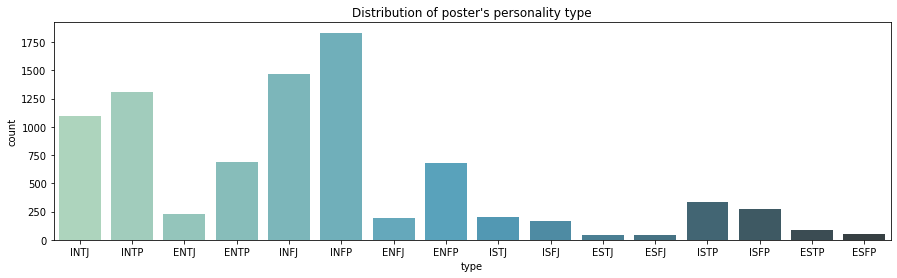

In [ ]:
fig, ax = plt.subplots(figsize= (15.0, 4.0))
sns.set_palette(sns.color_palette("GnBu_d", 16))
sns.countplot(x = "type", data = train_visual, order=["INTJ", "INTP", "ENTJ", "ENTP", 
                                               "INFJ", "INFP", "ENFJ", "ENFP", 
                                               "ISTJ", "ISFJ", "ESTJ", "ESFJ", 
                                               "ISTP", "ISFP", "ESTP", "ESFP"])
plt.title("Distribution of poster's personality type")
plt.plot

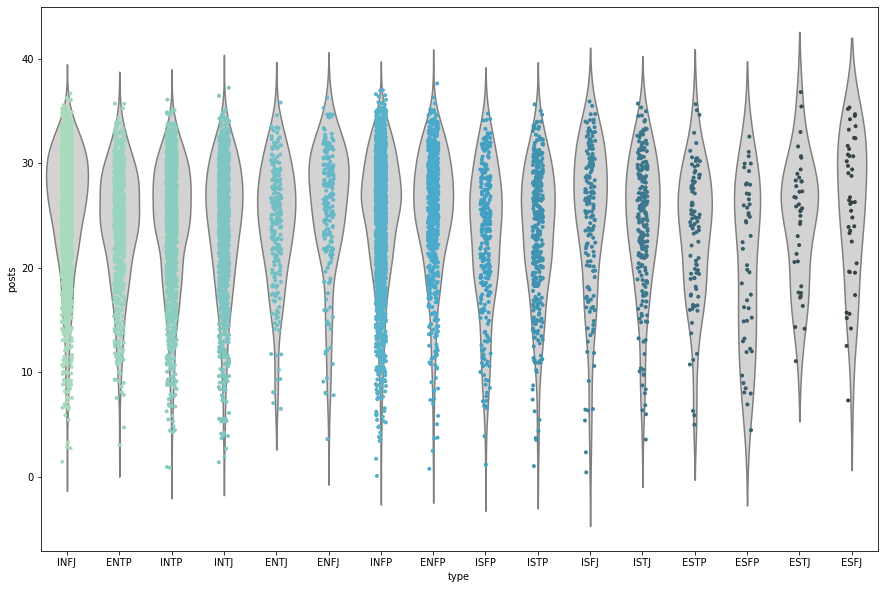

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y=EDAdf['posts'].apply(lambda x: len(x.split())/50), data=EDAdf, inner=None, color='lightgray')
sns.stripplot(x='type', y=EDAdf['posts'].apply(lambda x: len(x.split())/50), data=EDAdf, size=4, jitter=True)

In [ ]:
# Creating mapping for the different criterion
train_visual["Mind"] = train_visual["type"].map(lambda x: 'Introversion' if x[0] == 'I' else 'Extroversion')
train_visual["Energy"] = train_visual["type"].map(lambda x: 'Intuition' if x[1] == 'N' else 'Sensing')
train_visual["Nature"] = train_visual["type"].map(lambda x: 'Thinking' if x[2] == 'T' else 'Feeling')
train_visual["Tactics"] = train_visual["type"].map(lambda x: 'Judging' if x[3] == 'J' else 'Perceiving')

In [ ]:
train_visual.head()

,type,posts,Mind,Energy,Nature,Tactics
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introversion,Intuition,Feeling,Judging
1,ENTP,'I'm finding the lack of me in these posts ver...,Extroversion,Intuition,Thinking,Perceiving
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introversion,Intuition,Thinking,Perceiving
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introversion,Intuition,Thinking,Judging
4,ENTJ,'You're fired.|||That's another silly misconce...,Extroversion,Intuition,Thinking,Judging


In [ ]:
# Explore the counts for each axis of the types
print('Introversion (I) – Extroversion (E)', '\n', train_visual['Mind'].value_counts(), '\n')
print('Intuition (N) – Sensing (S)', '\n', train_visual['Energy'].value_counts(), '\n')
print('Thinking (T) – Feeling (F)', '\n', train_visual['Nature'].value_counts(), '\n')
print('Judging (J) – Perceiving (P)', '\n', train_visual['Tactics'].value_counts(), '\n')

Introversion (I) – Extroversion (E) 
 Introversion    6676
Extroversion    1999
Name: Mind, dtype: int64 

Intuition (N) – Sensing (S) 
 Intuition    7478
Sensing      1197
Name: Energy, dtype: int64 

Thinking (T) – Feeling (F) 
 Feeling     4694
Thinking    3981
Name: Nature, dtype: int64 

Judging (J) – Perceiving (P) 
 Perceiving    5241
Judging       3434
Name: Tactics, dtype: int64 



Text(0.5, 1.0, 'Mind Distribution')

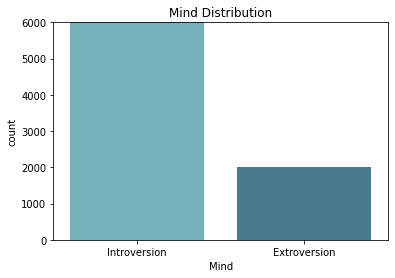

In [ ]:
sns.set_palette(sns.color_palette("GnBu_d", 2))
sns.countplot(x="Mind", data=train_visual, order=["Introversion", "Extroversion"])
plt.ylim(0,6000)
plt.title("Mind Distribution")

Text(0.5, 1.0, 'Energy Distribution')

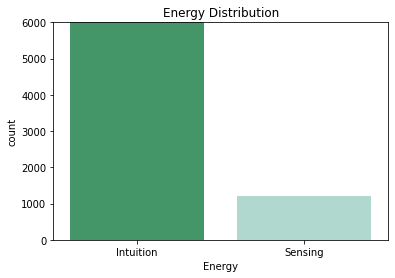

In [ ]:
sns.set_palette(sns.color_palette("BuGn_r", 2))
sns.countplot(x="Energy", data=train_visual, order=["Intuition", "Sensing"])
plt.ylim(0,6000)
plt.title("Energy Distribution")

Text(0.5, 1.0, 'Nature Distribution')

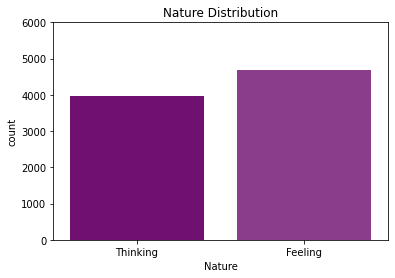

In [ ]:
sns.set_palette(sns.light_palette("purple", reverse=True))
sns.countplot(x="Nature", data=train_visual, order=["Thinking", "Feeling"])
plt.ylim(0,6000)
plt.title("Nature Distribution")

Text(0.5, 1.0, 'Tactics Distribution')

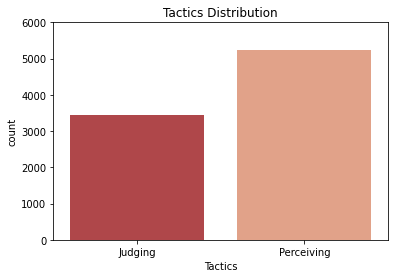

In [ ]:
sns.set_palette(sns.color_palette("RdBu"))
sns.countplot(x="Tactics", data=train_visual, order=["Judging", "Perceiving"])
plt.ylim(0,6000)
plt.title("Tactics Distribution")

In [ ]:
# Splitting posts
full['posts'] = full['posts'].apply(lambda x: x.split('|||'))
full['posts'] = full['posts'].apply(lambda x: ' '.join(x))

In [ ]:
# Mapping binary according to competition standard
full['mind'] = full['type'].apply(lambda s: s[0])
full['mind'] = full['mind'].map({'I':0,'E':1})

full['energy'] = full['type'].apply(lambda s: s[1])
full['energy'] = full['energy'].map({'S':0,'N':1})

full['nature'] = full['type'].apply(lambda s: s[2])
full['nature'] = full['nature'].map({'F':0,'T':1})

full['tactics'] = full['type'].apply(lambda s: s[3])
full['tactics'] = full['tactics'].map({'P':0,'J':1})

In [ ]:
# Removing the website addresses and replacing it with URL
url_pattern = r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)'
url_replace = r'URL'
full['posts'] = full['posts'].replace(to_replace = url_pattern, value = url_replace, regex = True)

In [ ]:
full['posts'] = full['posts'].str.lower()

In [ ]:
def remove_punctuation(post):
    return ''.join([letter for letter in post if letter not in string.punctuation])

full['posts'] = full['posts'].apply(remove_punctuation)

In [ ]:
full['tokened'] = full['posts'].apply(TreebankWordTokenizer().tokenize)

In [ ]:
# Stemming the posts
stemmer = SnowballStemmer('english')

def stemmerizer(words, stemmer):
    return [stemmer.stem(word) for word in words]

full['stemmed'] = full['tokened'].apply(stemmerizer, args=(stemmer, ))

In [ ]:
# Removing stop words
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]
full['stopped'] = full['stemmed'].apply(remove_stop_words)

In [ ]:
# Cleaned posts
full['clean'] = full['stopped'].apply(lambda x: ' '.join(x))

In [ ]:
# =pd.dataframe()

In [ ]:
full['id']=[x for x in range(len(full))]


In [ ]:
full

,type,posts,tokened,stemmed,stopped,clean,id
0,INFJ,url url enfp and intj moments url sportscent...,"[url, url, enfp, and, intj, moments, url, spor...","[url, url, enfp, and, intj, moment, url, sport...","[url, url, enfp, intj, moment, url, sportscent...",url url enfp intj moment url sportscent top te...,0
1,ENTP,im finding the lack of me in these posts very ...,"[im, finding, the, lack, of, me, in, these, po...","[im, find, the, lack, of, me, in, these, post,...","[im, find, lack, post, veri, alarm, sex, bore,...",im find lack post veri alarm sex bore posit of...,1
2,INTP,good one url of course to which i say i kn...,"[good, one, url, of, course, to, which, i, say...","[good, one, url, of, cours, to, which, i, say,...","[good, one, url, cours, say, know, bless, curs...",good one url cours say know bless curs doe abs...,2
3,INTJ,dear intp i enjoyed our conversation the oth...,"[dear, intp, i, enjoyed, our, conversation, th...","[dear, intp, i, enjoy, our, convers, the, othe...","[dear, intp, enjoy, convers, day, esoter, gab,...",dear intp enjoy convers day esoter gab natur u...,3
4,ENTJ,youre fired thats another silly misconception ...,"[youre, fired, thats, another, silly, misconce...","[your, fire, that, anoth, silli, misconcept, t...","[fire, anoth, silli, misconcept, approach, log...",fire anoth silli misconcept approach logic go ...,4
...,...,...,...,...,...,...,...
8670,ISFP,url ixfp just because i always think of cats a...,"[url, ixfp, just, because, i, always, think, o...","[url, ixfp, just, becaus, i, alway, think, of,...","[url, ixfp, becaus, alway, think, cat, fi, dom...",url ixfp becaus alway think cat fi dom reason ...,8670
8671,ENFP,soif this thread already exists someplace else...,"[soif, this, thread, already, exists, someplac...","[soif, this, thread, alreadi, exist, someplac,...","[soif, thread, alreadi, exist, someplac, els, ...",soif thread alreadi exist someplac els doe url...,8671
8672,INTP,so many questions when i do these things i wo...,"[so, many, questions, when, i, do, these, thin...","[so, mani, question, when, i, do, these, thing...","[mani, question, thing, would, take, purpl, pi...",mani question thing would take purpl pill pick...,8672
8673,INFP,i am very conflicted right now when it comes t...,"[i, am, very, conflicted, right, now, when, it...","[i, am, veri, conflict, right, now, when, it, ...","[veri, conflict, right, come, want, children, ...",veri conflict right come want children honest ...,8673


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(full['clean'])
testX = vectorizer.transform(full['clean'])

In [ ]:
print('Train shape is:', X.shape)
print('Test shape is:', testX.shape)

Train shape is: (8675, 127501)
Test shape is: (8675, 127501)


In [ ]:
# Train Test Split
y = full['type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X_train ', X_train.shape, '\n', 'X_test ', X_test.shape, '\n', 'y_train ', y_train.shape, '\n', 
      'y_test', y_test.shape)

X_train  (6940, 127501) 
 X_test  (1735, 127501) 
 y_train  (6940,) 
 y_test (1735,)


In [ ]:
lgr = LogisticRegression()
lgr1=lgr.fit(X_train, y_train)
print("TRAINING SET")
print("Accuracy: ", lgr1.score(X_train, y_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, lgr1.predict(X_train)))
print("Classification Report:")
print(classification_report(y_train, lgr1.predict(X_train)))
print("")

print("TEST SET")
print("Accuracy: ", lgr1.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lgr1.predict(X_test)))
print("Classification Report:")
print(classification_report(y_test, lgr1.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


TRAINING SET
Accuracy:  0.8093659942363113
Confusion Matrix:
[[  49    8    0    1    0    0    0    0   34   36    8   12    0    0
     0    1]
 [   1  414    2    9    0    0    0    0   29   60   21    8    1    0
     2    3]
 [   1    6   91    7    0    0    0    0    5   19   29   24    1    2
     0    2]
 [   0   11    0  432    0    0    0    0   22   24   17   42    0    1
     1    0]
 [   0    2    0    0    4    0    0    0    6    9    1   10    1    2
     0    0]
 [   0    3    0    1    0    0    0    0    8   16    5    6    0    1
     0    0]
 [   0    3    1    4    0    0    1    0    4    9    5    4    0    0
     0    1]
 [   0    1    2   11    0    0    0   13   12    8    9   12    0    1
     1    4]
 [   1    9    0    9    0    0    0    0 1069   60   14   17    0    1
     0    2]
 [   2    6    1    6    0    0    0    1   18 1391   13   16    1    5
     0    2]
 [   0    4    0    8    0    0    0    0   26   35  800   21    0    0
     2    2]
 [  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        ENFJ       0.91      0.33      0.48       149
        ENFP       0.85      0.75      0.80       550
        ENTJ       0.93      0.49      0.64       187
        ENTP       0.85      0.79      0.81       550
        ESFJ       1.00      0.11      0.21        35
        ESFP       0.00      0.00      0.00        40
        ESTJ       1.00      0.03      0.06        32
        ESTP       0.87      0.18      0.29        74
        INFJ       0.82      0.90      0.86      1182
        INFP       0.76      0.95      0.84      1462
        INTJ       0.81      0.89      0.85       898
        INTP       0.80      0.91      0.85      1011
        ISFJ       0.92      0.37      0.53       121
        ISFP       0.86      0.48      0.61       218
        ISTJ       0.90      0.45      0.60       161
        ISTP       0.90      0.77      0.83       270

    accuracy                           0.81      6940
   macro avg       0.82   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y

array(['INFJ', 'ENTP', 'INTP', ..., 'INTP', 'INFP', 'INFP'], dtype=object)

In [ ]:
import pickle
pickle.dump(lgr1,open('iri.pkl','wb'))

In [ ]:
cm_lgr = np.array(confusion_matrix(y_test, lgr.predict(X_test)))

cm_logreg = pd.DataFrame(cm_lgr, index=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP',
                                       'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP',
                                       'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                            columns=['predict_ENFJ','predict_ENFP','predict_ENTJ',
                                     'predict_ENTP','predict_ESFJ','predict_ESFP',
                                     'predict_ESTJ','predict_ESTP','predict_INFJ',
                                     'predict_INFP','predict_INTJ','predict_INTP',
                                     'predict_ISFJ','predict_ISFP','predict_ISTJ',
                                     'predict_ISTP'])
cm_logreg

,predict_ENFJ,predict_ENFP,predict_ENTJ,predict_ENTP,predict_ESFJ,predict_ESFP,predict_ESTJ,predict_ESTP,predict_INFJ,predict_INFP,predict_INTJ,predict_INTP,predict_ISFJ,predict_ISFP,predict_ISTJ,predict_ISTP
ENFJ,6,3,0,0,0,0,0,0,11,15,2,3,0,0,1,0
ENFP,0,71,0,4,0,0,0,0,10,25,9,5,0,0,0,1
ENTJ,2,2,12,4,0,0,0,0,2,4,12,6,0,0,0,0
ENTP,0,5,0,74,0,0,0,0,14,14,13,14,0,1,0,0
ESFJ,0,0,0,1,0,0,0,0,0,1,2,2,0,0,1,0
ESFP,0,2,1,2,0,0,0,0,0,1,1,1,0,0,0,0
ESTJ,0,0,1,1,0,0,0,0,2,2,1,0,0,0,0,0
ESTP,0,0,0,1,0,0,0,2,1,3,1,5,0,0,0,2
INFJ,0,6,0,8,0,0,0,0,195,49,14,16,0,0,0,0
INFP,2,4,0,4,0,0,0,0,15,322,7,13,0,1,1,1


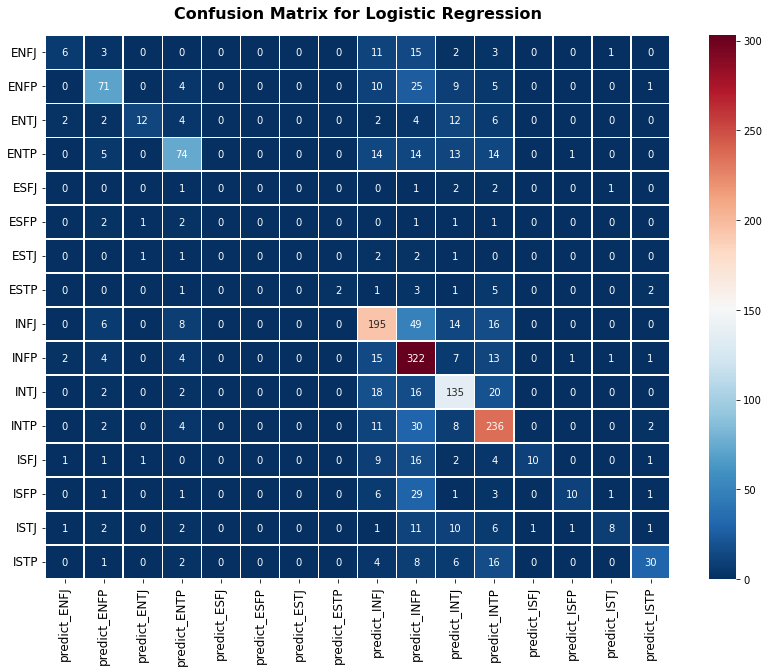

In [ ]:
# Create confusion matrix heatmap of Logistic Regression model 
fig, ax = plt.subplots(figsize=(14,10)) 
plt.title('Confusion Matrix for Logistic Regression', fontsize=16,
          fontweight='bold', y=1.02)
sns.heatmap(cm_logreg, robust=True, annot=True, linewidth=0.5, 
            fmt='', cmap='RdBu_r', vmax=303, ax=ax)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12);

In [ ]:
rfc = RandomForestClassifier(n_estimators=30, min_samples_leaf=50, oob_score=True, n_jobs= -1, random_state=123)
rfc.fit(X_train, y_train)
print("TRAINING SET")
print("Accuracy: ", rfc.score(X_train, y_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, rfc.predict(X_train)))
print("Classification Report:")
print(classification_report(y_train, rfc.predict(X_train)))
print("")

print("TEST SET")
print("Accuracy: ", rfc.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc.predict(X_test)))
print("Classification Report:")
print(classification_report(y_test, rfc.predict(X_test)))

TRAINING SET
Accuracy:  0.36023054755043227
Confusion Matrix:
[[   0    0    0    0    0    0    0    0   19  127    1    2    0    0
     0    0]
 [   0    0    0    0    0    0    0    0   60  486    2    2    0    0
     0    0]
 [   0    0    0    0    0    0    0    0   21  148    8   10    0    0
     0    0]
 [   0    0    0    0    0    0    0    0   71  436    5   38    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    4   31    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    4   32    2    2    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    2   30    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0   10   61    2    1    0    0
     0    0]
 [   0    0    0    0    0    0    0    0  638  539    1    4    0    0
     0    0]
 [   0    0    0    0    0    0    0    0   30 1430    1    1    0    0
     0    0]
 [   0    0    0    0    0    0    0    0   82  608  162   46    0    0
     0    0]
 [ 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       149
        ENFP       0.00      0.00      0.00       550
        ENTJ       0.00      0.00      0.00       187
        ENTP       0.00      0.00      0.00       550
        ESFJ       0.00      0.00      0.00        35
        ESFP       0.00      0.00      0.00        40
        ESTJ       0.00      0.00      0.00        32
        ESTP       0.00      0.00      0.00        74
        INFJ       0.60      0.54      0.57      1182
        INFP       0.27      0.98      0.42      1462
        INTJ       0.81      0.18      0.30       898
        INTP       0.69      0.27      0.38      1011
        ISFJ       0.00      0.00      0.00       121
        ISFP       0.00      0.00      0.00       218
        ISTJ       0.00      0.00      0.00       161
        ISTP       0.00      0.00      0.00       270

    accuracy                           0.36      6940
   macro avg       0.15   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Convert confusion matrix to a dataframe to prepare it for heatmapping
cm_rfc = np.array(confusion_matrix(y_test, rfc.predict(X_test)))

cm_randomforest = pd.DataFrame(cm_rfc, index=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP',
                                       'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP',
                                       'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                            columns=['predict_ENFJ','predict_ENFP','predict_ENTJ',
                                     'predict_ENTP','predict_ESFJ','predict_ESFP',
                                     'predict_ESTJ','predict_ESTP','predict_INFJ',
                                     'predict_INFP','predict_INTJ','predict_INTP',
                                     'predict_ISFJ','predict_ISFP','predict_ISTJ',
                                     'predict_ISTP'])
cm_randomforest

,predict_ENFJ,predict_ENFP,predict_ENTJ,predict_ENTP,predict_ESFJ,predict_ESFP,predict_ESTJ,predict_ESTP,predict_INFJ,predict_INFP,predict_INTJ,predict_INTP,predict_ISFJ,predict_ISFP,predict_ISTJ,predict_ISTP
ENFJ,0,0,0,0,0,0,0,0,6,35,0,0,0,0,0,0
ENFP,0,0,0,0,0,0,0,0,8,116,0,1,0,0,0,0
ENTJ,0,0,0,0,0,0,0,0,5,37,1,1,0,0,0,0
ENTP,0,0,0,0,0,0,0,0,20,101,1,13,0,0,0,0
ESFJ,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0
ESFP,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0
ESTJ,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0
ESTP,0,0,0,0,0,0,0,0,1,13,0,1,0,0,0,0
INFJ,0,0,0,0,0,0,0,0,107,176,0,5,0,0,0,0
INFP,0,0,0,0,0,0,0,0,15,352,1,2,0,0,0,0


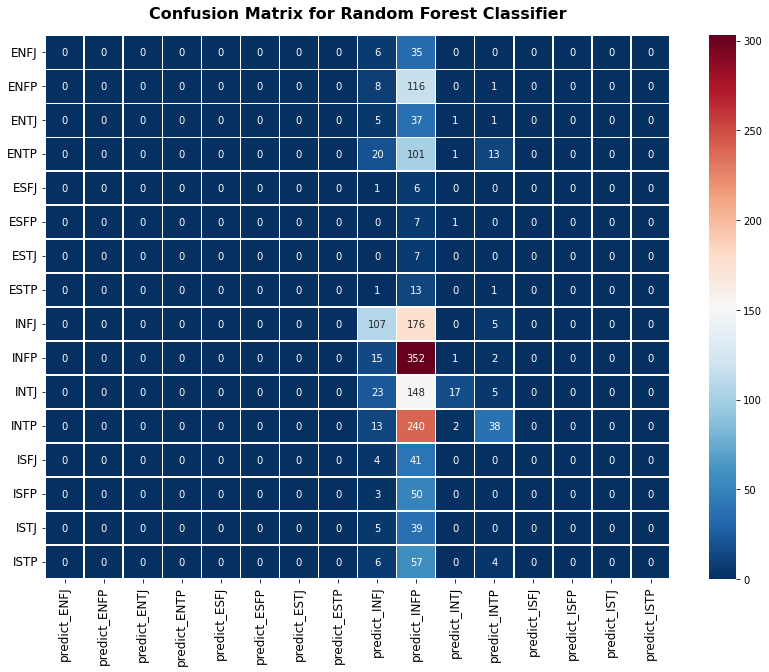

In [ ]:
# Create confusion matrix heatmap of Random Forest Classifier model 
fig, ax = plt.subplots(figsize=(14,10)) 
plt.title('Confusion Matrix for Random Forest Classifier', fontsize=16,
          fontweight='bold', y=1.02)
sns.heatmap(cm_randomforest, robust=True, annot=True, linewidth=0.5, 
            fmt='', cmap='RdBu_r', vmax=303, ax=ax)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12);

In [ ]:
# Train-test splits, using type variables as target and posts variable as predictor
yIE = full['mind'].values
yNS = full['energy'].values
yTF = full['nature'].values
yJP = full['tactics'].values

# Introversion - Extroversion
X_train_IE, X_test_IE, y_train_IE, y_test_IE = train_test_split(X, yIE, test_size=0.2, random_state = 42)
# Intuition - Sensing
X_train_NS, X_test_NS, y_train_NS, y_test_NS = train_test_split(X, yNS, test_size=0.2, random_state = 42)
# Thinking - Feeling
X_train_TF, X_test_TF, y_train_TF, y_test_TF = train_test_split(X, yTF, test_size=0.2, random_state = 42)
# Judging - Perceiving
X_train_JP, X_test_JP, y_train_JP, y_test_JP = train_test_split(X, yJP, test_size=0.2, random_state = 42)

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
param_grid = { 
    'n_estimators': [10, 20, 50, 85],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'class_weight' : ['balanced', 'balanced_subsample']
}

rfcclf = GridSearchCV(rfc, param_grid, cv=5)
gridrfcm = rfcclf.fit(X_train_IE, y_train_IE)
print('Best Mind n_estimators:', gridrfcm.best_estimator_.get_params()['n_estimators'])
print('Best Mind max_features:', gridrfcm.best_estimator_.get_params()['max_features'])
print('Best Mind max_depth:', gridrfcm.best_estimator_.get_params()['max_depth'])
print('Best Mind criterion:', gridrfcm.best_estimator_.get_params()['criterion'])
print('Best Mind class_weight:', gridrfcm.best_estimator_.get_params()['class_weight'])
print(" ")
gridrfce = rfcclf.fit(X_train_NS, y_train_NS)
print('Best Energy n_estimators:', gridrfce.best_estimator_.get_params()['n_estimators'])
print('Best Energy max_features:', gridrfce.best_estimator_.get_params()['max_features'])
print('Best Energy max_depth:', gridrfce.best_estimator_.get_params()['max_depth'])
print('Best Energy criterion:', gridrfce.best_estimator_.get_params()['criterion'])
print('Best Energy class_weight:', gridrfce.best_estimator_.get_params()['class_weight'])
print(" ")
gridrfcn = rfcclf.fit(X_train_TF, y_train_TF)
print('Best Nature n_estimators:', gridrfcn.best_estimator_.get_params()['n_estimators'])
print('Best Nature max_features:', gridrfcn.best_estimator_.get_params()['max_features'])
print('Best Nature max_depth:', gridrfcn.best_estimator_.get_params()['max_depth'])
print('Best Nature criterion:', gridrfcn.best_estimator_.get_params()['criterion'])
print('Best Nature class_weight:', gridrfcn.best_estimator_.get_params()['class_weight'])
print(" ")
gridrfct = rfcclf.fit(X_train_JP, y_train_JP)
print('Best Tactics n_estimators:', gridrfct.best_estimator_.get_params()['n_estimators'])
print('Best Tactics max_features:', gridrfct.best_estimator_.get_params()['max_features'])
print('Best Tactics max_depth:', gridrfct.best_estimator_.get_params()['max_depth'])
print('Best Tactics criterion:', gridrfct.best_estimator_.get_params()['criterion'])
print('Best Tactics class_weight:', gridrfct.best_estimator_.get_params()['class_weight'])

Best Mind n_estimators: 85
Best Mind max_features: auto
Best Mind max_depth: 8
Best Mind criterion: entropy
Best Mind class_weight: balanced
 
Best Energy n_estimators: 85
Best Energy max_features: auto
Best Energy max_depth: 8
Best Energy criterion: entropy
Best Energy class_weight: balanced
 
Best Nature n_estimators: 85
Best Nature max_features: auto
Best Nature max_depth: 8
Best Nature criterion: entropy
Best Nature class_weight: balanced_subsample
 
Best Tactics n_estimators: 85
Best Tactics max_features: auto
Best Tactics max_depth: 8
Best Tactics criterion: entropy
Best Tactics class_weight: balanced_subsample


In [ ]:
# Fit and score a Random Forest Classifier using the parameters identified by the grid search
rfc = RandomForestClassifier(n_estimators = 85, max_features = 'auto', max_depth = 8, 
                             criterion = 'gini', class_weight = 'balanced', random_state = 42)
rfc.fit(X_train_IE, y_train_IE)
print("TRAINING SET")
print("Accuracy: ", rfc.score(X_train_IE, y_train_IE))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_train_IE, rfc.predict(X_train_IE)))
print("Confusion Matrix (percentages):")
print(pd.DataFrame(confusion_matrix(y_train_IE, rfc.predict(X_train_IE))).apply(lambda x: x/x.sum(),axis=1))
print("Classification Report:")
print(classification_report(y_train_IE, rfc.predict(X_train_IE)))
print("")

print("TEST SET")
print("Accuracy: ", rfc.score(X_test_IE, y_test_IE))
print("Confusion Matrix (counts):")
print(confusion_matrix(y_test_IE, rfc.predict(X_test_IE)))
print("Confusion Matrix (percentages):")
print(pd.DataFrame(confusion_matrix(y_test_IE, rfc.predict(X_test_IE))).apply(lambda x: x/x.sum(),axis=1))
print("Classification Report:")
print(classification_report(y_test_IE, rfc.predict(X_test_IE)))

TRAINING SET
Accuracy:  0.9210374639769452
Confusion Matrix (counts):
[[4996  327]
 [ 221 1396]]
Confusion Matrix (percentages):
          0         1
0  0.938568  0.061432
1  0.136673  0.863327
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5323
           1       0.81      0.86      0.84      1617

    accuracy                           0.92      6940
   macro avg       0.88      0.90      0.89      6940
weighted avg       0.92      0.92      0.92      6940


TEST SET
Accuracy:  0.768299711815562
Confusion Matrix (counts):
[[1189  164]
 [ 238  144]]
Confusion Matrix (percentages):
          0         1
0  0.878788  0.121212
1  0.623037  0.376963
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1353
           1       0.47      0.38      0.42       382

    accuracy                           0.77      1735
   macro avg       0.65

In [ ]:
print(X)

  (0, 78398)	0.020256411037713983
  (0, 105833)	0.017466548675258146
  (0, 16196)	0.037213277946294365
  (0, 33844)	0.08344035042898479
  (0, 121114)	0.013745507326470351
  (0, 29288)	0.04582577195869324
  (0, 54107)	0.024363289014377582
  (0, 72740)	0.032108957985915156
  (0, 83924)	0.06452396260455856
  (0, 43085)	0.0519972435672692
  (0, 20710)	0.024610844827411354
  (0, 88575)	0.030001907420112925
  (0, 20480)	0.01866987514353595
  (0, 104243)	0.02593187332860386
  (0, 61795)	0.01431083106773352
  (0, 12736)	0.024606875075872493
  (0, 125566)	0.016554113264891448
  (0, 104744)	0.02600303085443124
  (0, 90772)	0.03731622443339121
  (0, 43066)	0.036125357694751545
  (0, 12592)	0.028782489669992584
  (0, 53222)	0.029730803300468518
  (0, 52929)	0.024496253692707137
  (0, 76465)	0.024646632015417856
  (0, 97905)	0.02200918829246474
  :	:
  (8674, 124099)	0.058557436558337575
  (8674, 120726)	0.0974895827729282
  (8674, 115716)	0.013414848569516209
  (8674, 71610)	0.03345083587362324
  

In [ ]:
# y = full['type'].values
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)
# print('X_train ', X_train.shape, '\n', 'X_test ', X_test.shape, '\n', 'y_train ', y_train.shape, '\n', 
#       'y_test', y_test.shape)

X_train  (6940, 127501) 
 X_test  (1735, 127501) 
 y_train  (6940,) 
 y_test (1735,)


In [ ]:
y_train

array(['INFJ', 'ENFP', 'ENTP', ..., 'INFJ', 'INFP', 'INTJ'], dtype=object)

In [ ]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier(random_state=39)
model_lgb.fit(X_train,y_train)

LGBMClassifier(random_state=39)

In [ ]:
print("TRAINING SET")
print("Accuracy: ", model_lgb.score(X_train, y_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, model_lgb.predict(X_train)))
print("Classification Report:")
print(classification_report(y_train, model_lgb.predict(X_train)))
print("")

print("TEST SET")
print("Accuracy: ", model_lgb.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_lgb.predict(X_test)))
print("Classification Report:")
print(classification_report(y_test, model_lgb.predict(X_test)))

TRAINING SET
Accuracy:  1.0
Confusion Matrix:
[[ 149    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0  550    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0  187    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0  550    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0   35    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0   40    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0   32    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0   74    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0 1182    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0 1462    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0  898    0    0    0
     0    0]
 [   0    0    0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(X_train, y_train)

print("TRAINING SET")
print("Accuracy: ", model_multinomial_nb.score(X_train, y_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, model_multinomial_nb.predict(X_train)))
print("Classification Report:")
print(classification_report(y_train, model_multinomial_nb.predict(X_train)))
print("")

print("TEST SET")
print("Accuracy: ", model_multinomial_nb.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_multinomial_nb.predict(X_test)))
print("Classification Report:")
print(classification_report(y_test, model_multinomial_nb.predict(X_test)))

TRAINING SET
Accuracy:  0.21253602305475505
Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0  149    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0  550    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0  187    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0  550    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0   35    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0   40    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0   32    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0   74    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0   13 1169    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0 1462    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0  897    0    1    0    0
     0    0]
 [ 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       149
        ENFP       0.00      0.00      0.00       550
        ENTJ       0.00      0.00      0.00       187
        ENTP       0.00      0.00      0.00       550
        ESFJ       0.00      0.00      0.00        35
        ESFP       0.00      0.00      0.00        40
        ESTJ       0.00      0.00      0.00        32
        ESTP       0.00      0.00      0.00        74
        INFJ       0.93      0.01      0.02      1182
        INFP       0.21      1.00      0.35      1462
        INTJ       0.00      0.00      0.00       898
        INTP       0.00      0.00      0.00      1011
        ISFJ       0.00      0.00      0.00       121
        ISFP       0.00      0.00      0.00       218
        ISTJ       0.00      0.00      0.00       161
        ISTP       0.00      0.00      0.00       270

    accuracy                           0.21      6940
   macro avg       0.07   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
